# Webscraping the Questions & Tags from `Stack exchange`

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

## Webscraping Questions

### Required Pages:
https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50  
https://astronomy.stackexchange.com/questions?tab=newest&page=2  
.  
.  
.  
.  
https://astronomy.stackexchange.com/questions?tab=newest&page=195  

In [10]:
pages=[]
pages.append("https://astronomy.stackexchange.com/questions?tab=newest&pagesize=50")

for i in list(range(2, 196)):
  pages.append('https://astronomy.stackexchange.com/questions?tab=newest&page='+str(i))


#pages

In [11]:
Questions=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  question_name_list = soup.find_all('h3')
  for question in question_name_list:
    if question.find('a'):
      Questions.append(question.find('a').text)

Questions=Questions[2:]
#print(Questions)



In [12]:
len(Questions)

10101

In [13]:
Questions[0] #first question

'How to plot сelestial equator in galactic coordinates?'

In [14]:
Questions[-1] #last question

'How do I calculate the inclination of an object with an amateur telescope?'

## Webscraping Tags

In [15]:
import re
from bs4 import BeautifulSoup

In [16]:
def listToString(s):
  # initialize an empty string 
  str1 = ""  
    
  # traverse in the string   
  for ele in s:  
      str1 += ele   
    
  # return string   
  return str1 


tag=[]

for i in pages:
  page = requests.get(i)
  soup = BeautifulSoup(page.text, 'html.parser')

  Tags=[]

  for div in soup.find_all('div', {"class": re.compile("^tags")}):      
    Tags.append(div.get('class')[1:])



  tagss=[]

  for j in Tags:
    tagss.append(listToString(j).replace('t-','|'))



  for k in tagss:
    tag.append(k[1:])
#tag

In [17]:
len(tag)

9713

In [18]:
tag[0]

'coordinate|python|visualization'

In [19]:
tag[-1]

'inclination|amateur-observing'

In [20]:
df = pd.DataFrame(list(zip(tag, Questions)), columns =['Tags', 'Questions']) 
df.head() 

,Tags,Questions
0,coordinate|python|visualization,How to plot сelestial equator in galactic coor...
1,orbit|the-moon|earth,What orbital period would produce one New Moon...
2,observational-astronomy|amateur-observing|mars,Is the Object in this Photo Mars?
3,astrophysics|cosmology|big-bang-theory|theories,What is the 'scale factor' equation for a dark...
4,apparen|magnitude,A double star consists of two stars of equal b...


In [21]:
df.shape

(9713, 2)

# Wordcloud for `Tags`

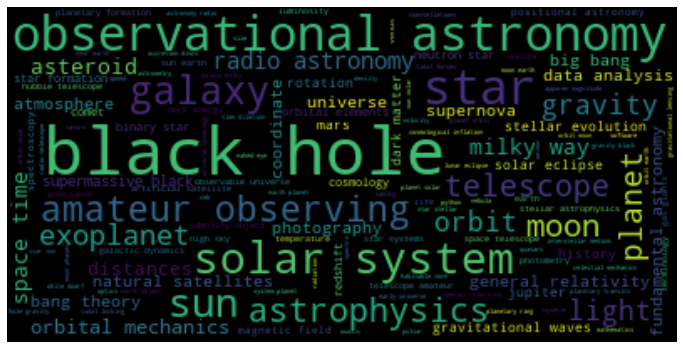

In [22]:
# get a list of the words in all Types, initialise a dictionary to zero values for each word
vocab = []
for Tags in df['Tags']:
    vocab.append(Tags)

vocab=', '.join(vocab)
#print(vocab)




from wordcloud import WordCloud 

# Start with one review:
text = vocab

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.subplots(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Making label column as per requirement for input to the fasttext module.

In [23]:
df["Tags"] = [item.replace("|", " __label__") for item in df["Tags"]]
df['Tags'] ='__label__' + df['Tags'].astype(str)

#columns_titles = ["Tags","Questions"]
#df=df.reindex(columns=columns_titles)

df.head()

,Tags,Questions
0,__label__coordinate __label__python __label__v...,How to plot сelestial equator in galactic coor...
1,__label__orbit __label__the-moon __label__earth,What orbital period would produce one New Moon...
2,__label__observational-astronomy __label__amat...,Is the Object in this Photo Mars?
3,__label__astrophysics __label__cosmology __lab...,What is the 'scale factor' equation for a dark...
4,__label__apparen __label__magnitude,A double star consists of two stars of equal b...


In [28]:
df['Tags'][0]

'__label__coordinate __label__python __label__visualization'

In [29]:
df['Questions'][0]

'How to plot сelestial equator in galactic coordinates?'

In [24]:
df.shape

(9713, 2)

In [56]:
len(df)

9713

# Dataframe to `.txt` file

In [73]:
f= open("astronomy_n.txt","w+") #open the file for writing
f.close() #finally closing the file 

In [74]:
df.to_csv(r'astronomy_n.txt', header=None, index=None, sep=' ', mode='a')

In [75]:
with open('astronomy_n.txt', 'r') as f, open('astronomy.txt', 'w') as fo:
    for line in f:
        fo.write(line.replace('"', '').replace("'", ""))

# Applying FastText on `astronomy.txt` file

In [76]:
!head astronomy.txt

__label__coordinate __label__python __label__visualization How to plot сelestial equator in galactic coordinates?
__label__orbit __label__the-moon __label__earth What orbital period would produce one New Moon (and one Full Moon) each year? What other effects would this produce?
__label__observational-astronomy __label__amateur-observing __label__mars Is the Object in this Photo Mars?
__label__astrophysics __label__cosmology __label__big-bang-theory __label__theories What is the scale factor equation for a dark-matter dominated universe?
__label__apparen __label__magnitude A double star consists of two stars of equal brightness at equal distance from the Earth. What is the apparent magnitude of the combined object?
__label__venus __label__life Is extra-planetary phosphine actually a new discovery?
__label__space __label__telescope How accurately could late 50s - early 60s humans have mapped the solar system?
__label__telescope __label__amateur-observing __label__mars How to view the sur

In [77]:
!wc astronomy.txt

   9713  120963 1078564 astronomy.txt


In [93]:
a= int(round(len(df)*0.75, 0))
print(a)
b= int(round(len(df)*0.25, 0))
b

7285


2428

In [109]:
!head -n 7285 astronomy.txt > astronomy.train
!tail -n 2428 astronomy.txt > astronomy.valid

In [96]:
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!cp fasttext ../
%cd ..

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 5.58 MiB/s, done.
Resolving deltas: 100% (2418/2418), done.
/content/fastText
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-lo

In [97]:
!./fasttext supervised -input ./astronomy.train -output ./astronomy_model1

Read 0M words
Number of words:  11394
Number of labels: 486
Progress: 100.0% words/sec/thread:   17292 lr:  0.000000 avg.loss:  8.145944 ETA:   0h 0m 0s


In [98]:
!./fasttext test astronomy_model1.bin ./astronomy.valid 3

N	2427
P@3	0.0703
R@3	0.0912
